In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
with open("data/pickle_files/peace_originators_2cats_split.pickle", "rb") as f:
    pickle_object = pickle.load(f)

In [4]:
X_train = pickle_object[0]
X_test = pickle_object[1]
y_train = pickle_object[2]
y_test = pickle_object[3]

In [5]:
ssX = StandardScaler()
ssX.fit(X_train)
X_train = ssX.transform(X_train)
X_test = ssX.transform(X_test)

In [6]:
model = LogisticRegression(random_state=42, C=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.55533597, 0.57114625, 0.62055336, 0.59881423, 0.57623762])

In [7]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.5907473309608541

In [8]:
model.score(X_test, y_test)

0.5741935483870968

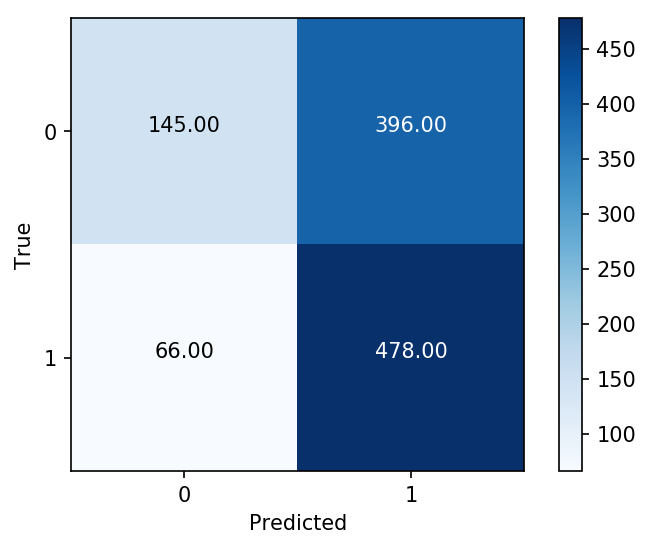

In [12]:
plt.figure(dpi=150)
cm = confusion_matrix(y_test, model.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar();
plt.xticks([0, 1])
plt.yticks([0, 1]);
plt.ylabel("True")
plt.xlabel("Predicted");
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [10]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.69      0.27      0.39       541
          1       0.55      0.88      0.67       544

avg / total       0.62      0.57      0.53      1085

